In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

plt.style.use("seaborn")

/tmp/ipykernel_20/295104853.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# Content

1. [Learning Path Comparison](#1)
2. [Test Results Comparison](#2)
3. [References](#3)


<a id='1'></a>
## 1. Learning Path Comparison

In this section, I've plotted the history results of the validation set for each model. Although I've assigned class weights to deal with imbalances, it was not sufficient. Therefore, the validation set learning curve became too noisy. To smooth the signal, I've also included the exponential moving averages (EMA) on the figures. My evaluations are based on EMA, since I think that in an unstable environment, making judgements based on the latest data is misleading.

Here are the outcomes:

**1. MobileNet**

* Validation Loss: Decreases during the learning process, which is expected (from 0.579 to 0.434).
* Precision: Increases considerably (from 0.480 to 0.658).
* Recall: Decreases significantly (from 0.902 to 0.727).
* F1 Score: Increases (from 0.616 to 0.678).

In general, the MobileNet model improves its ability to predict unseen data. The increment in performance mostly comes from an increase in precision, i.e., detected cancers are actually cancer. As precision increases, recall decreases, since the model's threshold to assign the given instance as cancer increases.

**2. CNN Model**

* Validation Loss: Decrease is not as good (from 0.655 to 0.414).
* Precision: Somewhat stable (from 0.792 to 0.761).
* Recall: Increases significantly (from 0.333 to 0.711).
* F1 Score: Increases considerably (from 0.449 to 0.722).

For the CNN model, the overall performance also improves when predicting unseen data. This time, the increment in performance mostly comes from an increase in recall, i.e., detecting the number of positives. As recall increases, precision decreases, since the model's threshold to assign the given instance as cancer decreases.

**3. VGG Model**

* Validation Loss: Somewhat stable, increases a bit (from 0.448 to 0.501).
* Precision: Somewhat stable (from 0.633 to 0.574).
* Recall: Somewhat stable (from 0.747 to 0.811).
* F1 Score: Somewhat stable (from 0.672 to 0.664).

The VGG model does not show significant improvement in predicting unseen data. Since it is a large model, it seems like the learning duration is insufficient.

**4. ResNet Model**

* Validation Loss: Somewhat stable, increases a bit (from 0.579 to 0.632).
* Precision: Somewhat stable (from 0.489 to 0.461).
* Recall: Somewhat stable (from 0.714 to 0.807).
* F1 Score: Somewhat stable (from 0.569 to 0.576).

The ResNet model also does not show significant improvement in predicting unseen data. The model's performance remains relatively stable across the different evaluation metrics.

In [2]:
#helper functions

def return_frame(path):
    return pd.DataFrame(pd.read_pickle(path))

def exponential_moving_average(input_list, alpha=0.3):
    ema = [input_list[0]]
    for value in input_list[1:]:
        ema.append(alpha * value + (1 - alpha) * ema[-1])
    return ema

def plot_validation_results(df, alpha=0.3):
    metrics = ["val_loss", "val_precision", "val_recall", "val_f1_score"]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        
        ax.plot(df[metric], label=f"Original {metric}", marker='o', linestyle='-')
        ema = exponential_moving_average(df[metric].tolist(), alpha)
        ax.plot(ema, label=f"Exponential moving average of {metric} (alpha: {alpha})", marker='o', linestyle='--')
        
        ax.set_xlabel("Epoch")
        ax.set_ylabel(metric)
        ax.set_title(f"{metric} vs. Epoch")
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    
def evaluation(history):
    metrics = ["val_loss", "val_precision", "val_recall", "val_f1_score"]
    for metric in metrics:
        print("Observed metric:",metric,format(history[metric][0],'.3f'),"------>", format(history[metric].to_list()[-1],'.3f'))
        
def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate("{:.3f}".format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha="center", va="bottom")

In [3]:
#read histories
cnn_model_history = return_frame("/kaggle/input/model-results/cnn_model_history.pkl")
resnet_model_history = return_frame("/kaggle/input/model-results/transfer_learning_historyResNet.pkl")
mobilenet_model_history = return_frame("/kaggle/input/model-results/transfer_learning_history.pkl")
vgg_model_history = return_frame("/kaggle/input/model-results/transfer_learning_historyVGG16.pkl")

#read test_results

cnn_model_test_results = pd.read_pickle("/kaggle/input/model-results/cnn_test_results.pkl")
resnet_model_test_results = pd.read_pickle("/kaggle/input/model-results/transfer_learning_test_resultsResNet.pkl")
mobilenet_model_test_results = pd.read_pickle("/kaggle/input/model-results/transfer_learning_test_results.pkl")
vgg_model_test_results = pd.read_pickle("/kaggle/input/model-results/transfer_learning_test_resultsVGG16.pkl")


# create a df to show the test results
test_results_df = pd.DataFrame([mobilenet_model_test_results,cnn_model_test_results,vgg_model_test_results,resnet_model_test_results],
            columns = ["test_loss", "test_precision","test_recall","test_f1"],index = ["MobileNet","CNN","VGG","ResNet"])
total_parameters = [2377415,897665,14771089,23754913]
total_computation = [21583104,82471680,723094272,370667520]
test_results_df["total_parameters"] = total_parameters
test_results_df["total_multadds"] = total_computation


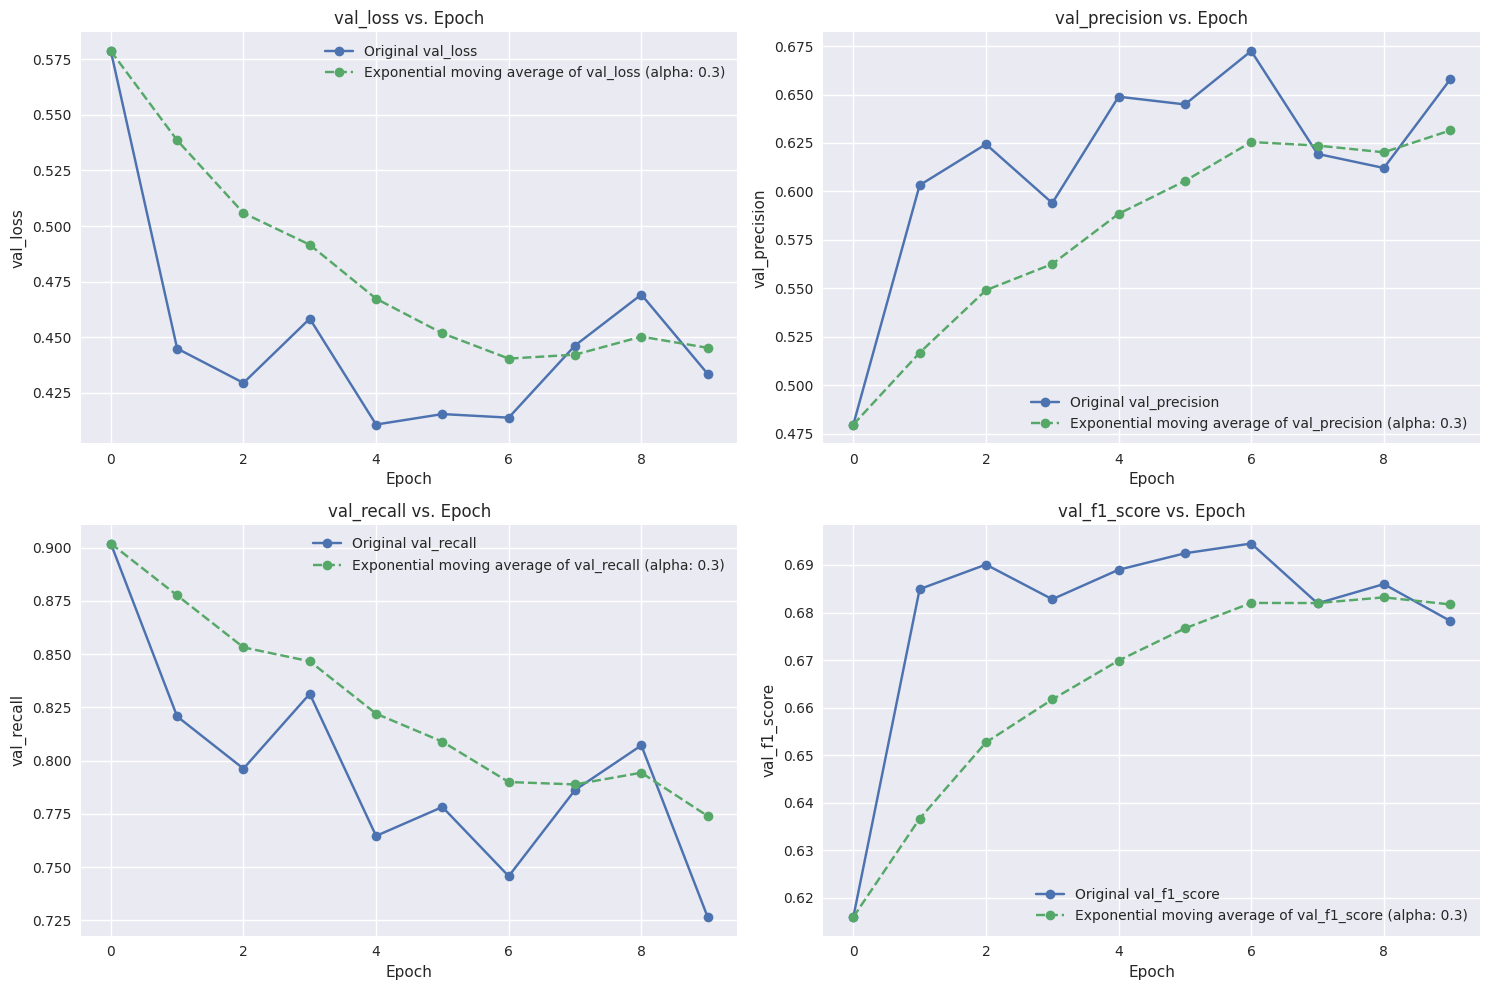

In [4]:
plot_validation_results(mobilenet_model_history)

------------------

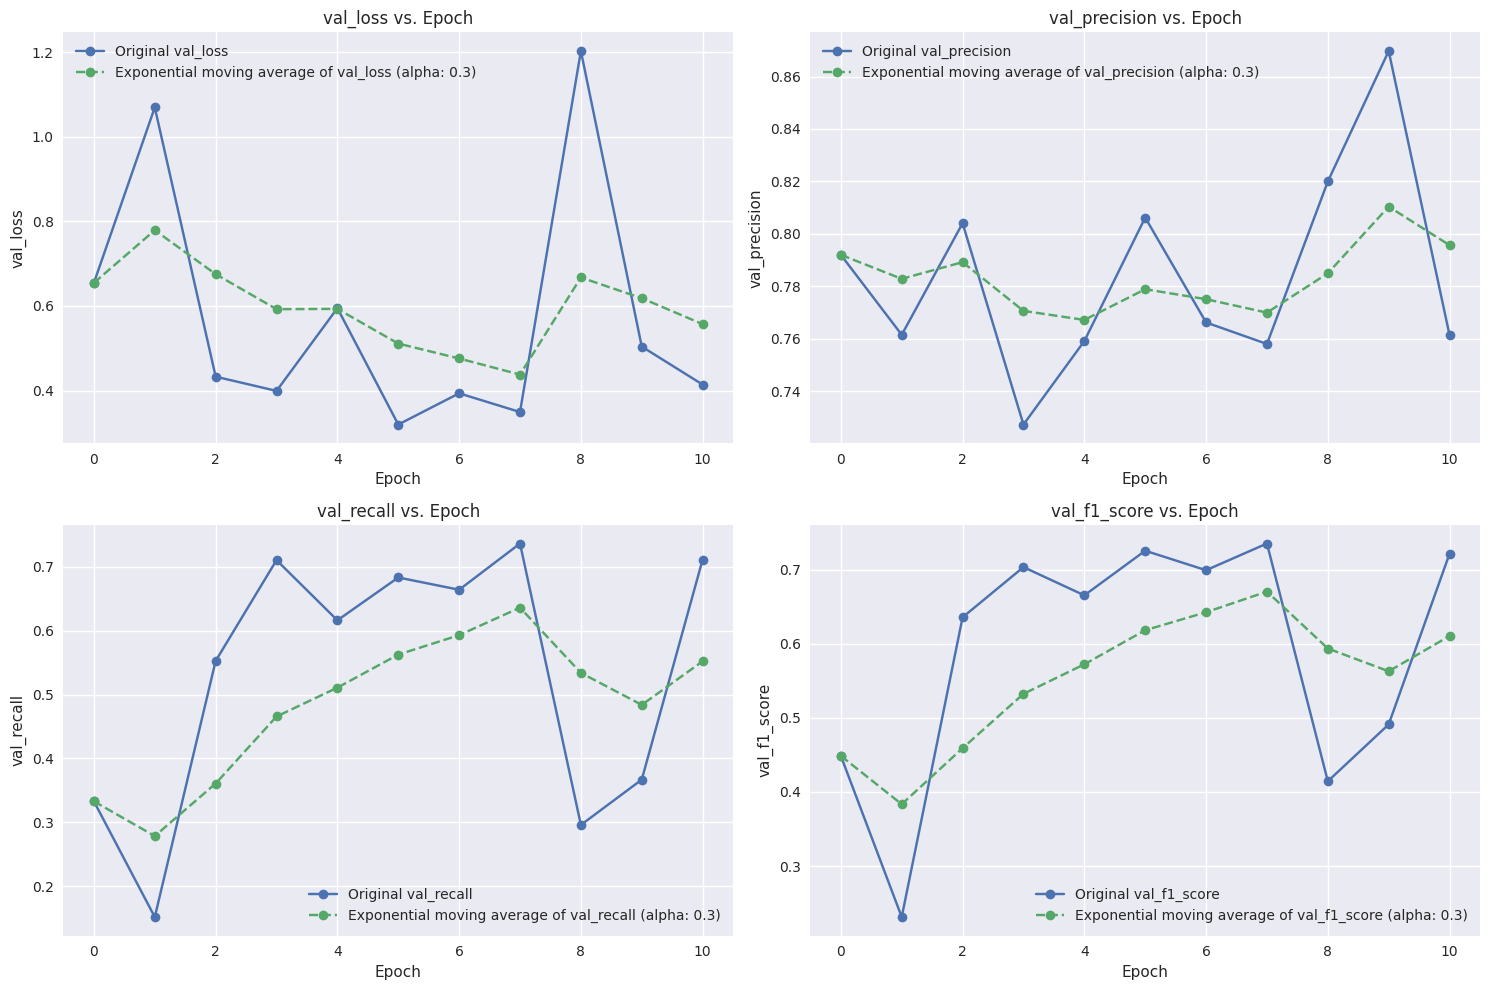

In [5]:
plot_validation_results(cnn_model_history)

In [6]:
evaluation(cnn_model_history)

Observed metric: val_loss 0.655 ------> 0.414
Observed metric: val_precision 0.792 ------> 0.761
Observed metric: val_recall 0.333 ------> 0.711
Observed metric: val_f1_score 0.449 ------> 0.722


------------------

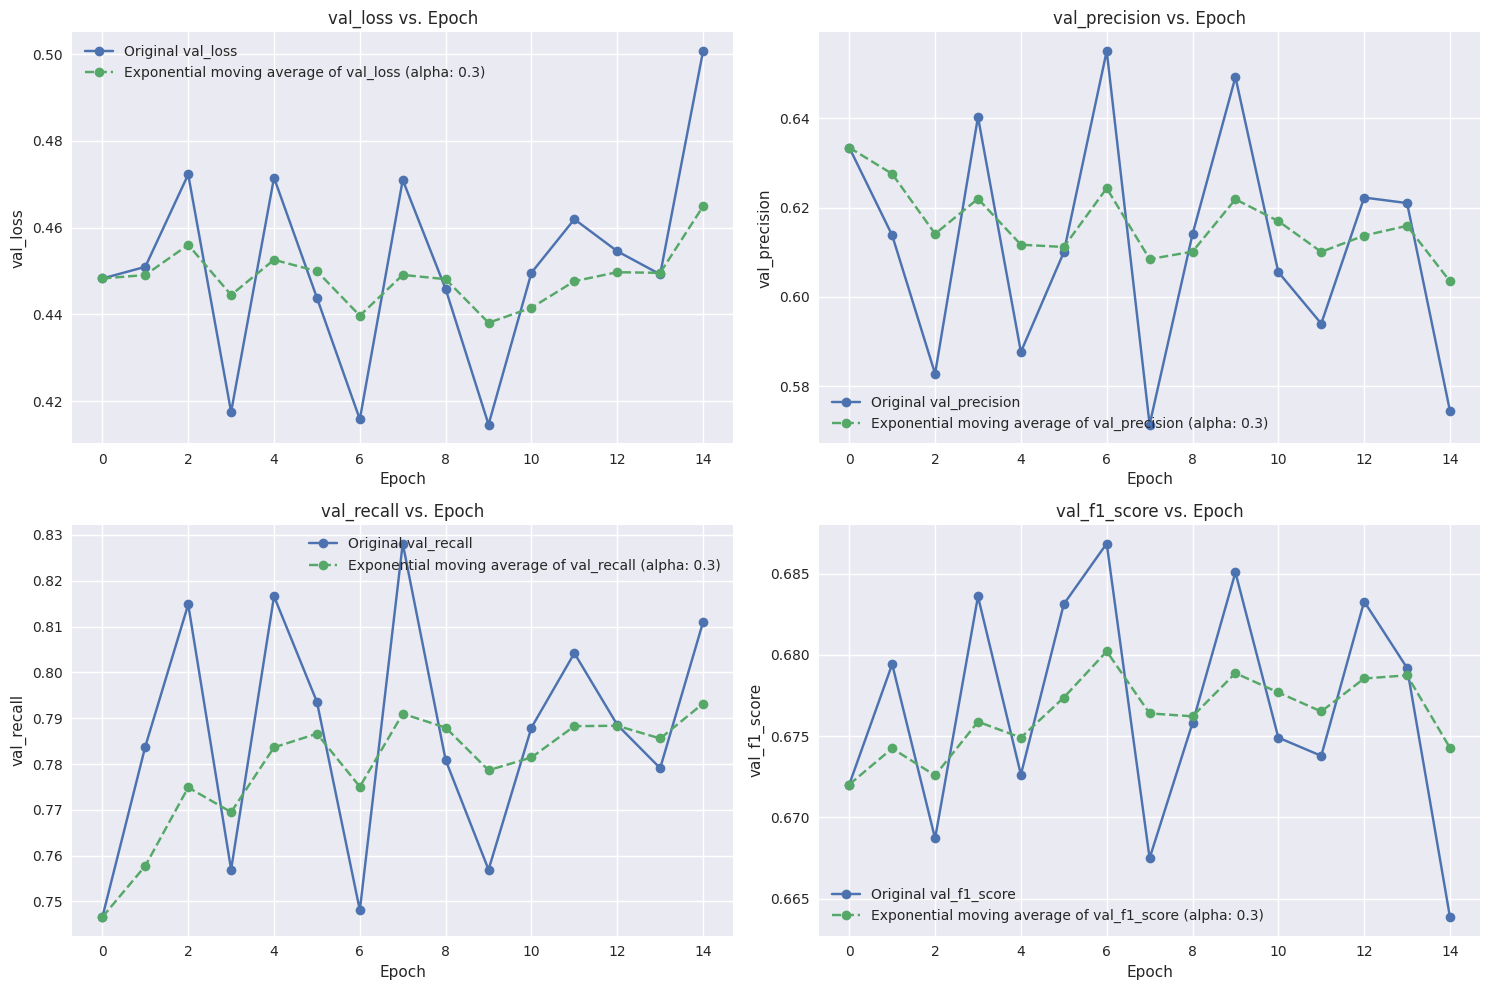

In [7]:
plot_validation_results(vgg_model_history)

In [8]:
evaluation(vgg_model_history)

Observed metric: val_loss 0.448 ------> 0.501
Observed metric: val_precision 0.633 ------> 0.574
Observed metric: val_recall 0.747 ------> 0.811
Observed metric: val_f1_score 0.672 ------> 0.664


------------------

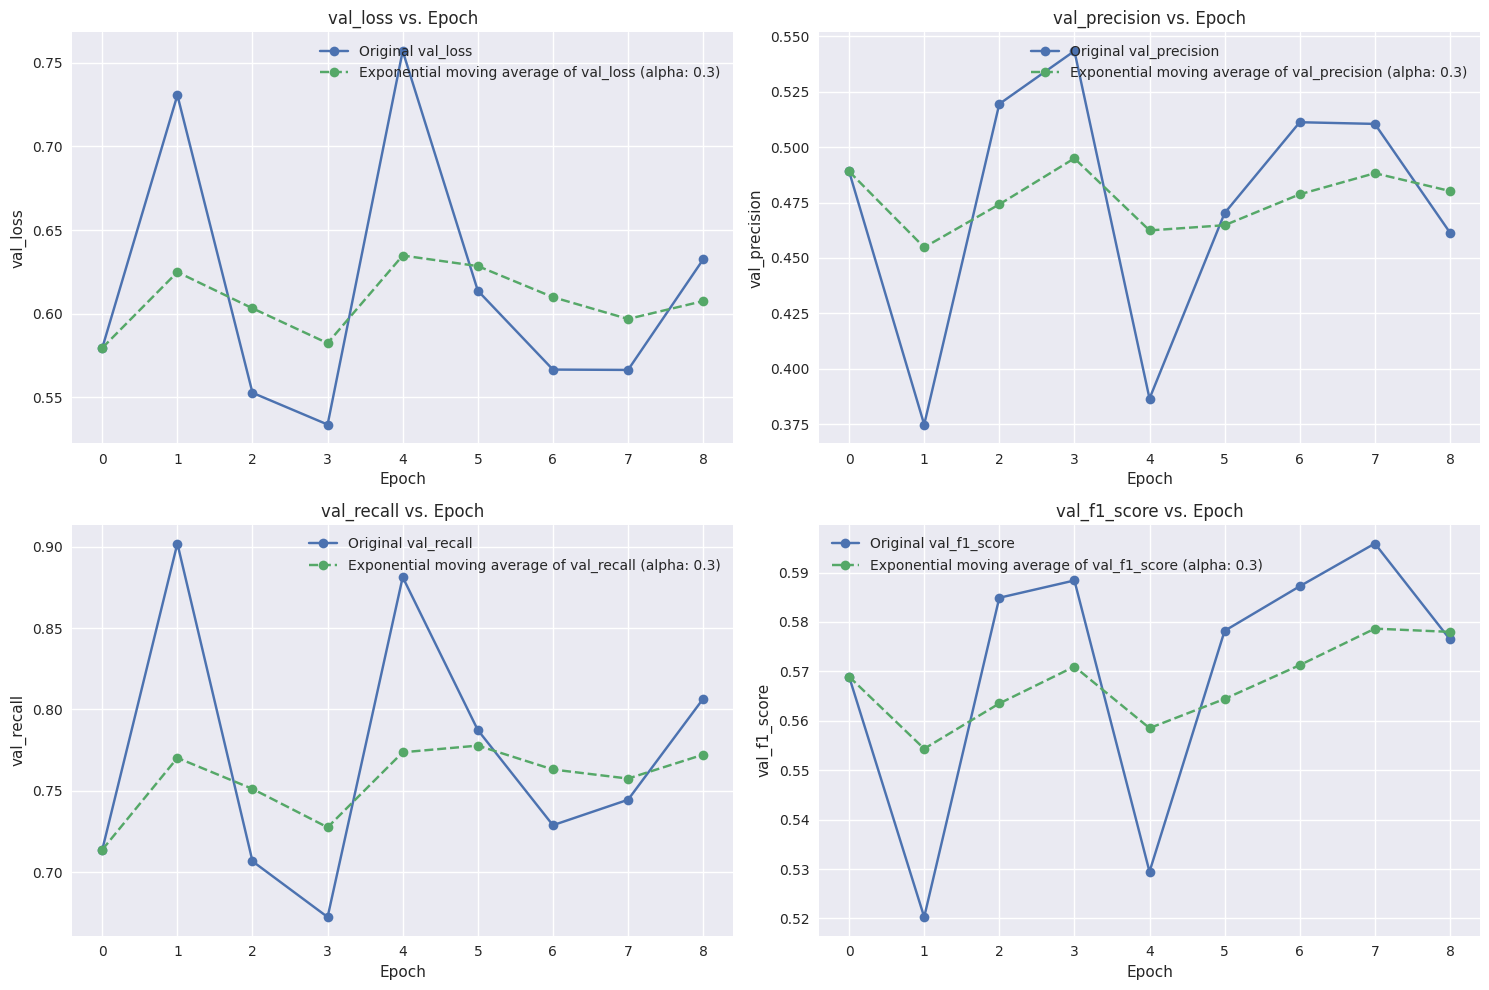

In [9]:
plot_validation_results(resnet_model_history)

In [10]:
evaluation(resnet_model_history)

Observed metric: val_loss 0.579 ------> 0.632
Observed metric: val_precision 0.489 ------> 0.461
Observed metric: val_recall 0.714 ------> 0.807
Observed metric: val_f1_score 0.569 ------> 0.576


------------------

<a id='2'></a>
## 2. Test Results Comparison

In this section, I compare the performance of the MobileNet, CNN, VGG, and ResNet models on the cancer dataset. As observed in the experiments (found in MobileNet paper), each model exhibits different performance characteristics in terms of computational requirements, number of parameters, and prediction accuracy.

The MobileNet model demonstrates a good balance between computational efficiency and prediction performance. Although it does not have the highest F1 score (0.668 compared to CNN's 0.727), it requires significantly fewer parameters and computations than the other models. This makes MobileNet an attractive choice for scenarios with limited resources or where a faster model is more desirable.

Surprisingly, the CNN model outperforms the state-of-the-art models in this comparison (has the highest F1 score - 0.727). This suggests that the CNN model may be more suitable for the cancer dataset compared to the models which were pretrained with ImageNet dataset.

The VGG model performed best in precision (0.822), which makes it an ideal choice for applications where predicting the cancer cases correctly is the most important, eventhough it misses some true cancer cases. On the other hand, the CNN model has the highest recall (0.715), which indicates its ability to detect most cancer cases, although it sometimes detects wrongly.

In summary, each model has upsides and downsides. As expected, the MobileNet model is the best when it comes to the *efficiency*. The CNN model is the best performer in terms of F1 score. Lastly, the VGG model should be considered when the highest precision is desired.

I have to add this: These results could be improved by implementing data augmentation techniques. Although all the models were optimized, I did not use any data augmentation techniques besides rescaling.

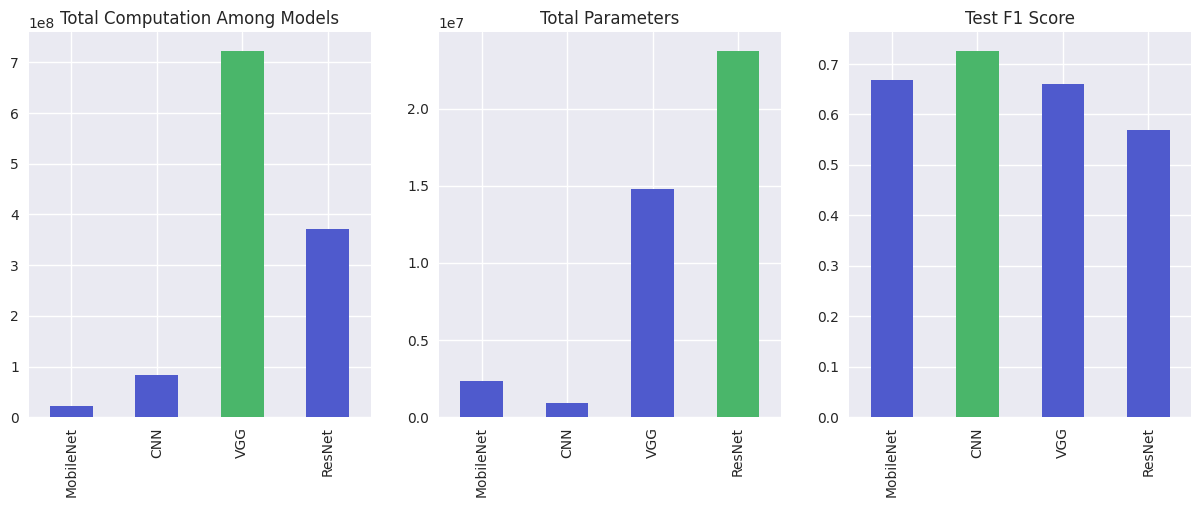

In [11]:
#to highlight the largest
color_selection_mult = ["#4AB66A" if index == test_results_df["total_multadds"].idxmax() else "#4F5ACD"for index in test_results_df.index]
color_selection_param = ["#4AB66A" if index == test_results_df["total_parameters"].idxmax() else "#4F5ACD"for index in test_results_df.index]
color_selection_f1 = ["#4AB66A" if index == test_results_df["test_f1"].idxmax() else "#4F5ACD"for index in test_results_df.index]
color_selection_precision = ["#4AB66A" if index == test_results_df["test_precision"].idxmax() else "#4F5ACD"for index in test_results_df.index]
color_selection_recall = ["#4AB66A" if index == test_results_df["test_recall"].idxmax() else "#4F5ACD"for index in test_results_df.index]



fig,ax = plt.subplots(figsize = (15,5),ncols = 3, nrows = 1) 
test_results_df["total_multadds"].plot(kind = "bar", title = "Total Computation Among Models", ax = ax[0],color = color_selection_mult)
test_results_df["total_parameters"].plot(kind = "bar", title = "Total Parameters", ax = ax[1],color = color_selection_param)
test_results_df["test_f1"].plot(kind = "bar", title = "Test F1 Score", ax = ax[2],color = color_selection_f1)

fig.show()

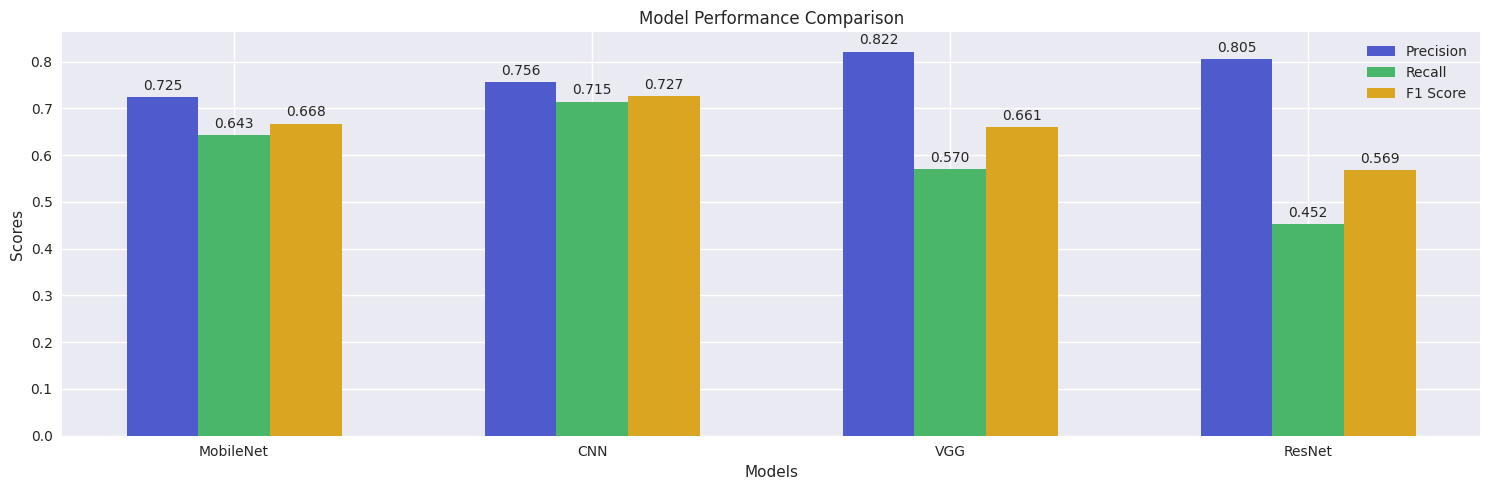

In [12]:

fig, ax = plt.subplots(figsize=(15, 5))

bar_width = 0.2
index = np.arange(len(test_results_df.index))

# Create bar chart
rects1 = ax.bar(index, test_results_df["test_precision"], bar_width, color="#4F5ACD", label="Precision")
rects2 = ax.bar(index + bar_width, test_results_df["test_recall"], bar_width, color="#4AB66A", label="Recall")
rects3 = ax.bar(index + 2 * bar_width, test_results_df["test_f1"], bar_width, color="#DAA520", label="F1 Score")

ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Model Performance Comparison")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(test_results_df.index)
ax.legend()

# Add values above bars
add_labels(ax, rects1)
add_labels(ax, rects2)
add_labels(ax, rects3)


plt.tight_layout()
plt.show()

<a id='2'></a>
## 2. References

1. [Hyperband](https://arxiv.org/abs/1603.06560)
2. [MobileNet](https://arxiv.org/abs/1704.04861)
3. [Color Selection](https://htmlcolorcodes.com/)
4. [Add labels on top of bar chart](https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart)
5. [Reading the data](https://www.kaggle.com/code/thesnak/breast-cancer-classification-96-89)


Thanks...